#📌 Extracão

In [42]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.json_normalize(data)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformação

In [44]:
df.shape

(7267, 21)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [46]:
df["account.Charges.Total"] = pd.to_numeric(
    df["account.Charges.Total"],
    errors="coerce"
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [47]:
df[df["account.Charges.Total"].isnull()][
    ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]
].head()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
975,0,56.05,NaN
1775,0,20.00,NaN
1955,0,61.90,NaN
2075,0,19.70,NaN
2232,0,20.25,NaN


In [48]:
df = df.dropna(subset=["account.Charges.Total"])

df.shape

(7256, 21)

#📊 Carga e análise

In [49]:
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.711549
Yes,0.257580
,0.030871


In [50]:
df["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

In [51]:
df = df[df["Churn"] != ""]

df["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


In [52]:
df.shape

(7032, 21)

In [53]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df["Churn"].mean()

np.float64(0.26578498293515357)

In [54]:
df["Contas_Diarias"] = df["account.Charges.Monthly"] / 30

df[["account.Charges.Monthly", "Contas_Diarias"]].head()

,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [55]:
df.groupby("Churn")["customer.tenure"].mean()

,customer.tenure
Churn,
0,37.650010
1,17.979133


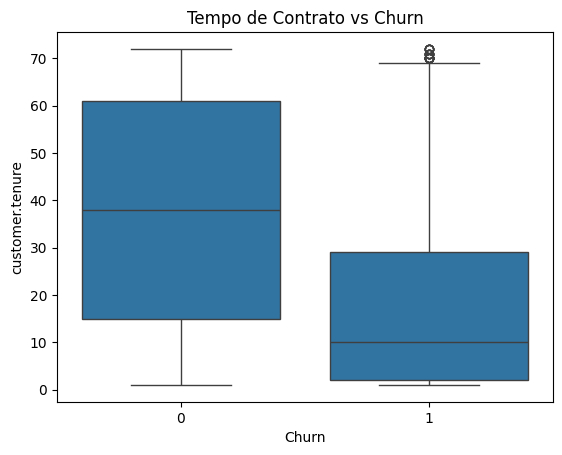

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Churn", y="customer.tenure", data=df)
plt.title("Tempo de Contrato vs Churn")
plt.show()

In [57]:
df.groupby("account.Contract")["Churn"].mean().sort_values(ascending=False)

,Churn
account.Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [58]:
df.groupby("account.Contract")["customer.tenure"].mean()

,customer.tenure
account.Contract,
Month-to-month,18.036645
One year,42.073370
Two year,57.071810


In [59]:
df.groupby("Churn")["account.Charges.Monthly"].mean()

,account.Charges.Monthly
Churn,
0,61.307408
1,74.441332


In [60]:
df.groupby("internet.InternetService")["Churn"].mean().sort_values(ascending=False)

,Churn
internet.InternetService,
Fiber optic,0.418928
DSL,0.189983
No,0.074342


In [61]:
pd.crosstab(df["internet.InternetService"], df["account.Contract"], normalize="index")

account.Contract,Month-to-month,One year,Two year
internet.InternetService,,,
DSL,0.506209,0.235927,0.257864
Fiber optic,0.687339,0.174096,0.138566
No,0.344737,0.238816,0.416447


In [62]:
df.groupby("internet.TechSupport")["Churn"].mean().sort_values(ascending=False)

,Churn
internet.TechSupport,
No,0.416475
Yes,0.151961
No internet service,0.074342


In [63]:
df[(df["internet.InternetService"] == "Fiber optic") &
   (df["internet.TechSupport"] == "No")]["Churn"].mean()

np.float64(0.49372197309417043)

In [64]:
df[(df["account.Contract"] == "Month-to-month") &
   (df["internet.TechSupport"] == "No")]["Churn"].mean()


np.float64(0.503731343283582)

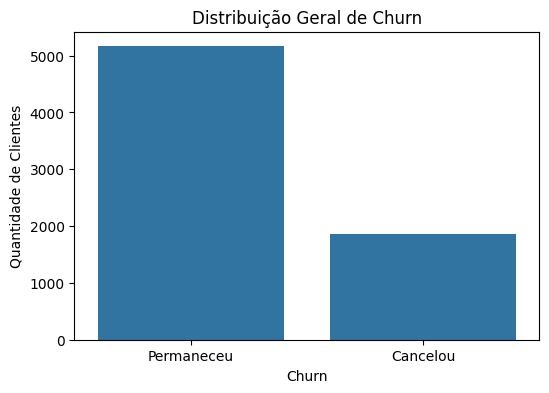

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Distribuição Geral de Churn")
plt.xticks([0,1], ["Permaneceu", "Cancelou"])
plt.ylabel("Quantidade de Clientes")
plt.show()

#📄Relatorio Final

Telecom X – Análise de Churn de Clientes

1. Introdução

A Telecom X enfrenta desafios significativos relacionados à evasão de clientes (Churn), impactando diretamente sua receita e crescimento sustentável.
O objetivo desta análise é identificar os principais fatores associados à evasão, a partir de técnicas de Extração, Transformação e Carga (ETL) e Análise Exploratória de Dados (EDA), fornecendo subsídios para ações estratégicas de retenção.

2. Base de Dados

Total de clientes analisados: 7.032

Total de variáveis: 21, abrangendo informações demográficas, tipo de serviço, histórico de contratos e faturamento

Dados obtidos diretamente de uma API em formato JSON, transformados em DataFrame para análise estruturada

A base foi preparada para análise consistente, eliminando registros com valores nulos ou inconsistentes e convertendo variáveis críticas para os tipos corretos.

3. Limpeza e Tratamento de Dados

As etapas de tratamento incluem:

Normalização do JSON: Transformação do JSON aninhado em formato tabular.

Conversão de tipos de dados:

account.Charges.Total convertido para numérico

Churn convertido para variável binária (0 = permanece, 1 = cancelou)

Remoção de registros inconsistentes:

Clientes com TotalCharges nulo ou Churn vazio foram removidos

Criação de novas métricas:

Contas_Diarias foi calculada a partir do faturamento mensal dividido por 30, para análise detalhada do comportamento financeiro diário

Após essas etapas, a base final contém 7.032 registros válidos, pronta para análise exploratória.

4. Análise Exploratória de Dados (EDA)
4.1 Taxa Geral de Churn

A taxa geral de evasão é de aproximadamente 26,6%, indicando que mais de um quarto da base de clientes cancela o serviço.

4.2 Tempo de Permanência (Tenure)

Clientes ativos: média de 37,6 meses

Clientes que cancelaram: média de 18 meses

Clientes com menor tempo de permanência apresentam maior risco de evasão, confirmando que os primeiros meses de contrato são críticos para retenção.

4.3 Tipo de Contrato

Month-to-month: 42,7% de churn

One year: 11,3% de churn

Two year: 2,8% de churn

Clientes com contrato mensal possuem risco de evasão significativamente superior aos de contratos anuais ou bienais.

4.4 Tipo de Internet

Fiber optic: 41,9% de churn

DSL: 19,0% de churn

Sem internet: 7,4% de churn

A fibra óptica apresenta a maior taxa de evasão, especialmente quando combinada com contratos mensais.

4.5 Suporte Técnico

Sem suporte técnico: 41,6% de churn

Com suporte técnico: 15,2% de churn

Clientes sem suporte técnico têm uma probabilidade de evasão próxima de 50%, especialmente quando associados a contratos mensais e fibra óptica.

4.6 Faturamento Mensal

Clientes que cancelam possuem uma mensalidade média maior 74,44 reais em comparação com clientes que permanecem 61,31 reais, indicando possível sensibilidade a preço ou percepção de valor do serviço.

5. Perfis de Maior Risco

O grupo de maior risco identificado possui as seguintes características:

Contrato mensal

Serviço de fibra óptica

Sem suporte técnico

Maior faturamento mensal

Menor tempo de permanência

Para este segmento, a taxa de churn é de aproximadamente 50%, destacando-o como prioritário para ações de retenção.

6. Conclusões

A análise mostra que a evasão de clientes na Telecom X não é aleatória, mas concentrada em segmentos específicos, principalmente clientes novos, com contratos mensais e serviços mais complexos sem suporte técnico adequado.
Além disso, clientes com faturamento mais alto apresentam maior risco de cancelamento, reforçando a necessidade de ações direcionadas.

7. Recomendações

Incentivar contratos de longo prazo: Oferecer benefícios para migração de contratos mensais para anuais ou bienais.

Programa de retenção inicial: Focar nos clientes nos primeiros 6 a 12 meses de contrato.

Oferta de suporte técnico: Disponibilizar suporte técnico gratuito ou com desconto, especialmente para clientes de fibra óptica.

Revisão da proposta de valor da fibra óptica: Garantir qualidade percebida alinhada ao preço.

Monitoramento contínuo: Identificar clientes de alto risco para intervenções preventivas.

8. Próximos Passos

Implementação de modelo preditivo de churn baseado nos perfis identificados.

Acompanhamento das métricas após aplicação de estratégias de retenção.

Ajustes contínuos na oferta de serviços e suporte, priorizando os segmentos críticos.